<a href="https://colab.research.google.com/github/tomiwagold/walmart/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Walmart.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [6]:
# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [7]:
df.drop(columns=['Date'], inplace=True)

In [8]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000


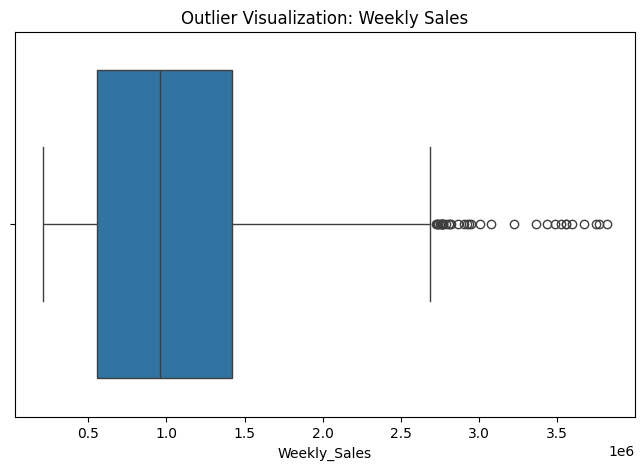

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Weekly_Sales'])
plt.title('Outlier Visualization: Weekly Sales')
plt.show()

In [11]:
# Outlier handling using IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
# Removing outliers
df = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]

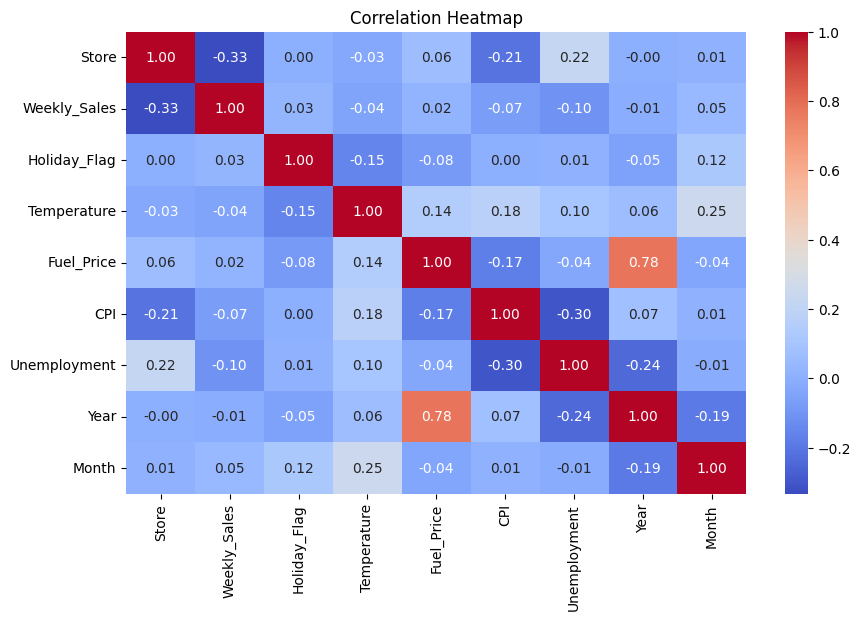

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

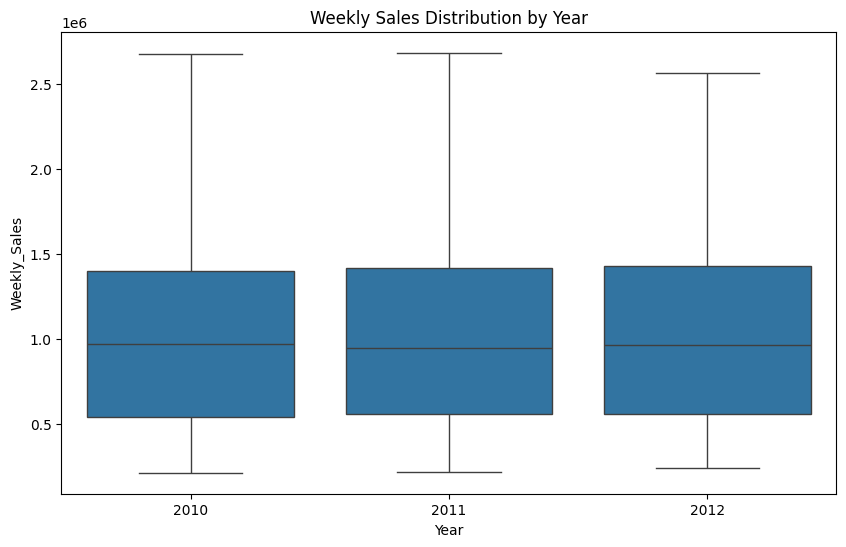

In [14]:
# Visualization: Weekly Sales by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution by Year')
plt.show()

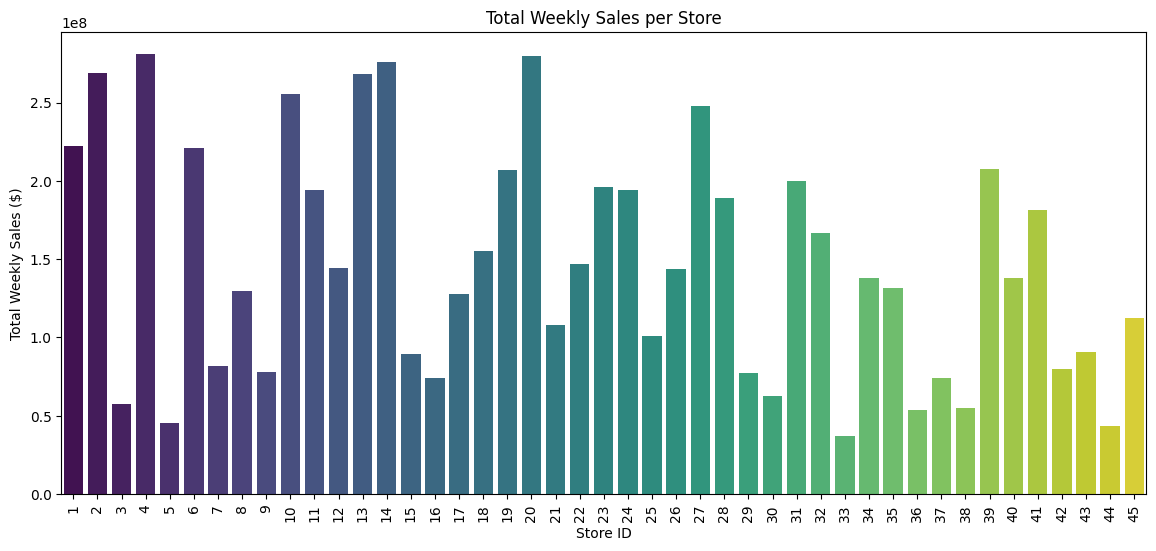

In [15]:
# SALES DISTRIBUTION ACROSS STORES

# Group sales by store and sum them up
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values()

# Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')

# Labels and title
plt.xlabel('Store ID')
plt.ylabel('Total Weekly Sales ($)')
plt.title('Total Weekly Sales per Store')
plt.xticks(rotation=90)  # Rotate store labels for readability
plt.show()

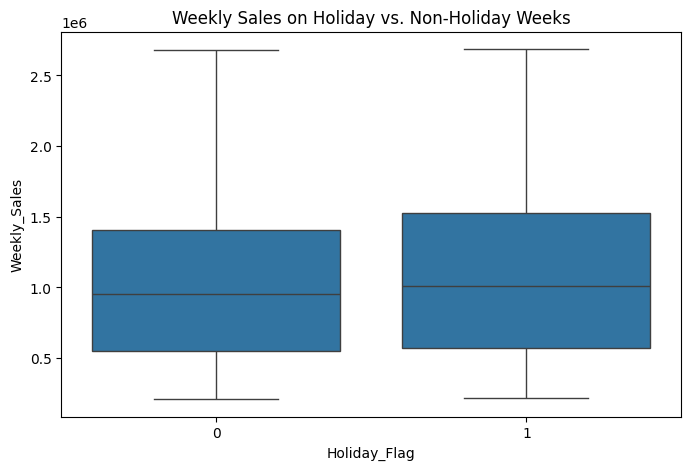

In [16]:
# Visualization: Impact of Holiday on Sales
plt.figure(figsize=(8, 5))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales on Holiday vs. Non-Holiday Weeks')
plt.show()

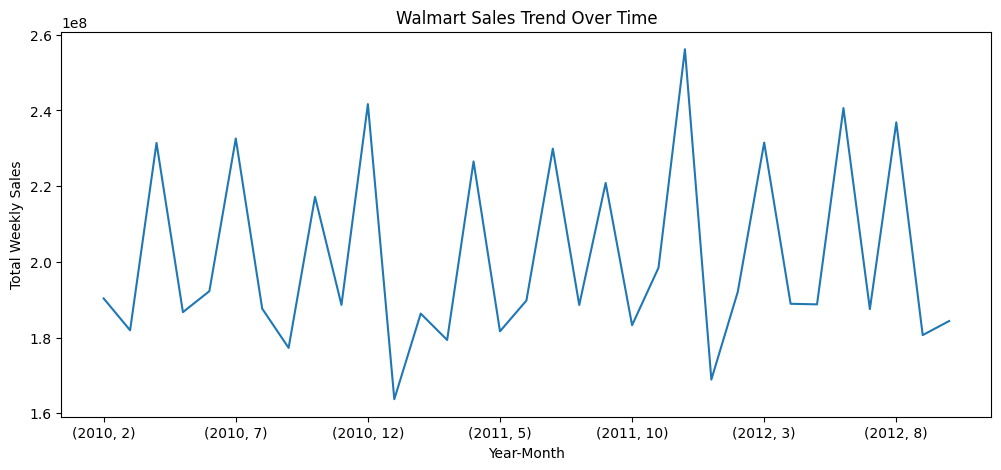

In [17]:
# Time-Series Sales Trend

df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().plot(figsize=(12, 5))
plt.xlabel('Year-Month')
plt.ylabel('Total Weekly Sales')
plt.title('Walmart Sales Trend Over Time')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month']]
y = df['Weekly_Sales']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Model training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [23]:
print("Random Forest Regressor Performance:")
print(f'MAE: {mae_rf:.2f}')
print(f'MSE: {mse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')

Random Forest Regressor Performance:
MAE: 68293.09
MSE: 15405385098.79
R-squared: 0.95


In [24]:
# Training Score vs Test Score

print("Train Score vs Test Score")

train_score = rf_model.score(X_train, y_train)
print(f"Train Score: {train_score:.2f}")

test_score = rf_model.score(X_test, y_test)
print(f"Test Score: {test_score:.2f}")

Train Score vs Test Score
Train Score: 0.99
Test Score: 0.95


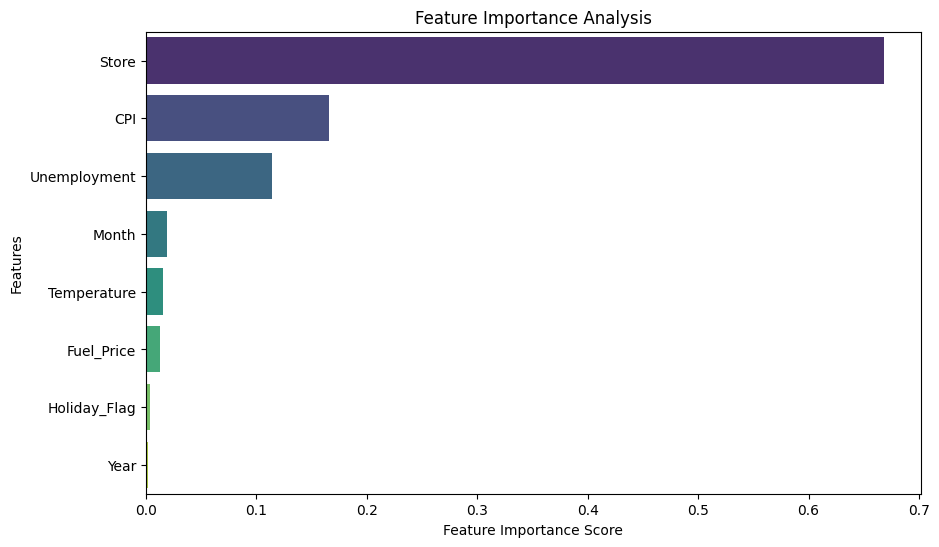

In [25]:
# Assuming X_train and y_train are already defined
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()
